# 1.Содержание

* [2.Описание проблемы и цель](#2)
* [3.Генерация гипотез](#3)
* [4.Импорт пакетов и сбор данных](#4)
* [5.Описание, идентификация и исправление переменных](#5)
* [6.Обработка выбросов](#6)
* [7.Замена отсутствующих переменных](#7)
* [8.Преобразование распределений](#8)
* [9.Двумерный Анализ](#9)
  * [9.1 Числовая-Числовая переменная](#9.1)
  * [9.2 Категориальная и числовая переменная](#9.2)
* [10.Разработка функций](#10)
  * [10.1 Создание новых функций](#10.1)
  * [10.2 Масштабирование функций](#10.2)
  * [10.3 Кодирование категориальных переменных](#10.3)
     * [10.3.1 Label Encoding](#10.3.1) [10.3.2 One Hot Encoding](#10.3.2)
* [11.Построение и оценка модели](#11)
   * [11.1 Модельное обучение](#11.1)
   * [11.2 Оценка модели](#11.2)
      * [11.2.1 K-Fold Cross Validation](#11.2.1)
      * [11.2.2 Оптимизация гиперпараметров](#11.2.2)
      * [11.2.3 Переподготовка и прогнозирование с использованием лучших гиперпараметров](#11.2.3)
      * [11.2.4  Важность функции](#11.2.4)
      * [11.2.5 Кривые обучения ](#11.2.5)

# 2. Описание проблемы и цель<a id="2"></a>
Соревнование от Kaggle. Попросите покупателя описать дом своей мечты, и он, вероятно, не начнет с высоты потолка подвала или близости к железной дороге с востока на запад. Но набор данных доказывает, что на переговоры о цене влияет гораздо больше, чем количество спален или белый забор. С 79 независимыми переменными, описывающими (почти) все аспекты жилых домов в Эймсе, штат Айова, это соревнование заставляет вас предсказать окончательную цену каждого дома. Итак, задача состоит в том, чтобы спрогнозировать цены на жилье в Эймсе, штат Айова, используя 79 переменных-предикторов, используя машинное обучение. Так что это проблема регрессии.

# 3. Генерация гипотез<a id="3"></a>
Генерация гипотез, как правило, заключается в создании набора функций, которые должны влиять на целевую переменную с учетом доверительного интервала (принимаемого за 95 % все время). Мы должны сделать это до того, как посмотрим на данные, чтобы избежать предвзятых мыслей. Этот шаг часто помогает в создании новых функций. Определение гипотезы состоит из двух частей: Нулевой гипотезы (H0) и Альтернативной гипотезы (H1).
* H0 (Нулевая гипотеза): Между нашими независимыми и зависимыми переменными нет никакой связи.
* H1 (Альтернативная гипотеза): Действительно, существует связь между нашими независимыми и зависимыми переменными.

Теперь, как мы можем принять или отвергнуть любую гипотезу? Обычно мы ищем значения вероятности (значение p) между нашими предикторными и целевыми переменными. То есть, если значение p является значительным (менее 0,05), мы можем отвергнуть нулевую гипотезу и утверждать, что полученные результаты подтверждают альтернативную гипотезу. С другой стороны, если значение p больше 0,05, мы не можем отвергнуть нулевую гипотезу и, следовательно, сделать вывод, что статистически нет никакой связи между нашими целевыми и предикторными переменными. Особенности, которые, по моему мнению, должны повлиять на цену дома, заключаются в следующем:
1. Площадь, на которой был построен дом.
2. Количество этажей, которые он имеет.
3. Количество спален, которые в нем есть.
4. Сколько лет дому.
5. Материалы, используемые для строительства дома
6. Расположение дома.
7. Как близко/далеко находится дом от рынка и так далее.

# 4.Импорт пакетов и сбор данных<a id="4"></a>
После импорта необходимых модулей считайте обучающие и тестовые данные из csv-файлов.

In [1]:
'''Игнорируем предупреждения'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

[документация по warnings](https://docs.python.org/3/library/warnings.html)

In [2]:
'''Импортируем базовые модули'''
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
'''Визуализация Seaborn и matplotlib.'''
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh') #стиль графиков [https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.13-Plot-Styles/]                    
sns.set_style({'axes.grid':True})  #сетка в графиках https://seaborn.pydata.org/generated/seaborn.set_style.html

'''Plotly визуализация '''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Для использования plotly в автономном режиме в блокноте jupyter

'''Отображать выходные данные жирным шрифтом'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string)) #создаем функию bold, в которой лежит Markdown. Markdown нужен для того чтобы делать шрифт 
#наклонным(*) или жирным(**)

In [4]:
'''Считываем train и test данные из файлов csv.'''
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 5. Описание, идентификация и исправление переменных.<a id="5"></a>

In [5]:
'''Смотрим на train и test'''
bold('**Train Data:**')
display(train.head(3))
bold('**Test Data:**')
display(test.head(3))

**Train Data:**

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

**Test Data:**

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  

[3 rows x 80 columns]

In [6]:
'''Размеры train и test'''
bold('**Размеры train и test**')
display(train.shape, test.shape)

**Размеры train и test**

(1460, 81)

(1459, 80)

In [7]:
'''Смотрим на имена наших переменных'''
bold('**Имена первых 20-ти переменных:**')
display(train.columns[:20].values)

**Имена первых 20-ти переменных:**

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt'], dtype=object)

#### Итак, что мы можем увидеть??
** Мы видим всего 81 переменную для train и 80 переменных для test данных. И у нас нет переменной *SalePrice* для набора test, потому что это будет нашей задачей(target). Таким образом, *SalePrice* - это наша целевая переменная, а остальные переменные - наши переменные-предикторы.**
#### Здесь приводится описание нескольких переменных:
* MSSubClass — Класс здания
* MSZoning — Общая классификация зонирования
* LotFrontage  — Линейные метры улицы, соединенной с недвижимостью
* LotArea  — размер участка в квадратных футах
* Street - тип подъездной дороги
* Alley  — Тип доступа в аллею
* LotShape  — Общая форма собственности
* LandContour  — Ровность участка
* Utilities  — Тип доступных коммунальных услуг
* LotConfig — Конфигурация лота
* Utilities : Уклон участка
* LotConfig : Физические местоположения в пределах города Эймс
* Condition1 : Близость к главной дороге или железной дороге
* Condition2 : Близость к главной дороге или железной дороге (при наличии второго)
* BldgType: Тип жилья
* HouseStyle: Стиль жилья
* OverallQual: Общее качество материала и отделки
* OverallCond: Общая оценка состояния
* YearBuilt: Первоначальная дата строительства

**Проверка переменных по одной, чтобы отделить категориальные переменные от числовых, займет так много времени. Следовательно, мы будем извлекать номинальные переменные из числовых переменных с помощью метода pandas select_dtypes, а затем визуализировать их с помощью гистограммы (для непрерывных переменных) или гистограммы (для номинальных и дискретных переменных), чтобы убедиться, что метод pandas select_dtypes не вводит нас в заблуждение.**

In [8]:
"""Давайте сначала проверим, со сколькими типами данных нам приходится иметь дело."""
merged = pd.concat([train, test], axis = 0, sort = True) #sort-сортирует колонки по алфавиту
bold('**Типы данных наших переменных:**')
display(merged.dtypes.value_counts())
merged[1458:1462]

**Типы данных наших переменных:**

object     43
int64      26
float64    12
dtype: int64

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
1458      1078         0          0   NaN             2     1Fam       TA   
1459      1256         0          0   NaN             3     1Fam       TA   
0          896         0          0   NaN             2     1Fam       TA   
1         1329         0          0   NaN             3     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... SaleType ScreenPorch  Street  \
1458           Mn        49.0      1029.0  ...       WD           0    Pave   
1459           No       830.0       290.0  ...       WD           0    Pave   
0              No       468.0       144.0  ...       WD         120    Pave   
1              No       923.0         0.0  ...       WD           0    Pave   

      TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
1458             5      1078.0     AllPub        366      1950         1996   
1459             6      1256.0     AllPub        736      1965         1965   
0                5       882.0     AllPub        140      1961         1961   
1                6      1329.0     AllPub        393      1958         1958   

     YrSold  
1458   2010  
1459   2008  
0      2010  
1      2010  

[4 rows x 81 columns]

In [9]:
'''Сначала извлечем числовые переменные.'''
num_merged = merged.select_dtypes(include = ['int64', 'float64']) #include-выбираем подмножество столбцов, 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
bold('**Числовые переменные:**')
display(num_merged.head(3))
bold('**Имена числовых переменных:**')
display(num_merged.columns.values)

**Числовые переменные:**

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       856       854          0             3       706.0         0.0   
1      1262         0          0             3       978.0         0.0   
2       920       866          0             3       486.0         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  OverallQual  \
0           1.0           0.0      150.0              0  ...            7   
1           0.0           1.0      284.0              0  ...            6   
2           1.0           0.0      434.0              0  ...            7   

   PoolArea  SalePrice  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  \
0         0   208500.0            0             8        856.0           0   
1         0   181500.0            0             6       1262.0         298   
2         0   223500.0            0             6        920.0           0   

   YearBuilt  YearRemodAdd  YrSold  
0       2003          2003    2008  
1       1976          1976    2007  
2       2001          2002    2008  

[3 rows x 38 columns]

**Имена числовых переменных:**

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype=object)

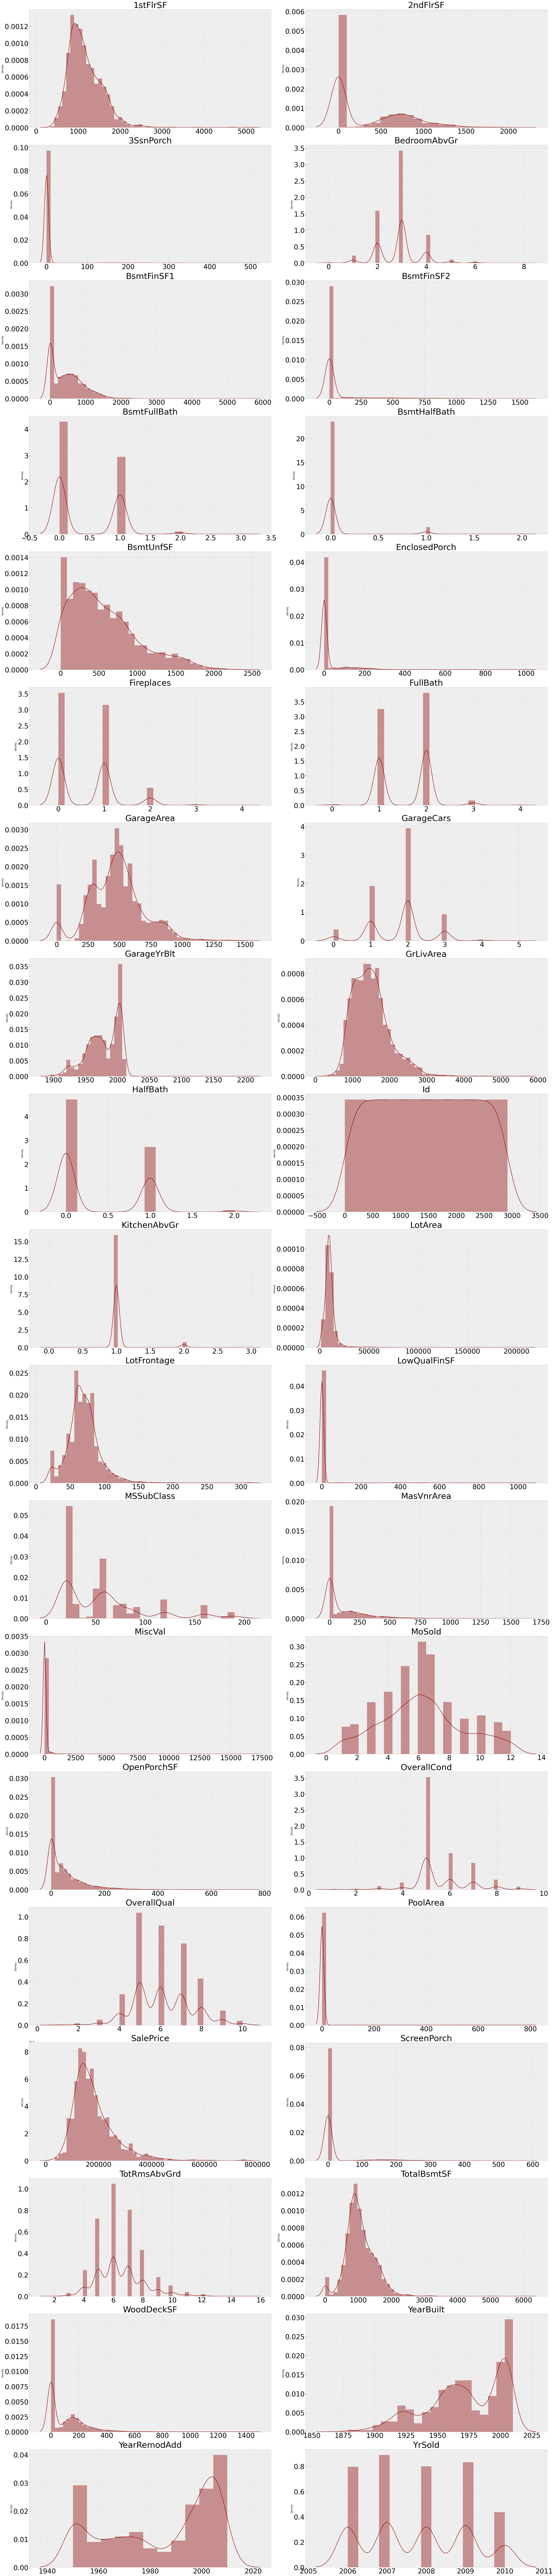

In [10]:
'''Строим гистограмму числовых переменных, чтобы подтвердить интуицию Pandas.'''
fig, axes = plt.subplots(nrows = 19, ncols = 2, figsize = (40, 200)) #nrows-кол-во строк, ncols-кол-во столбцов, figsize-размер
for ax, col in zip(axes.flatten(), num_merged.columns): 
    sns.distplot(num_merged[col].dropna(), ax = ax, color = 'darkred') #задаем ax как цикл axes.flatten(), а col цикл 
#num_merged.columns c помощью zip https://pythoner.name/zip
#axes.flatten() - массив из осей https://overcoder.net/q/1170569/%D1%87%D1%82%D0%BE-%D0%B4%D0%B5%D0%BB%D0%B0%D0%B5%D1%82-axesflat-%D0%B2-matplotlib
    ax.set_title(col, fontsize = 43) #название графика и размер его шрифта
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35) #размер шрифта осей
    ax.set_xlabel('') #устанавлиаем метку для оси x
fig.tight_layout(rect = [0, 0.03, 1, 0.95]) #регулируем отступы от заголовок и вокруг них

Мы можем ясно видеть, что некоторые распределения являются непрерывными (например, LotFrontage, LotArea и YearBuilt), а некоторые являются дискретными (например, Mssubclass, Overallqual, overallcond, BsmtFullBath и Halfbath и т. Д.). Давайте исправим типы данных соответствующим образом. Читая описание данных, мы видим, что некоторые переменные на самом деле являются категориальными (например, MSSubClass, Общее качество и общее значение). **Следовательно, мы бы явно разделили их на категориальные переменные.**

In [11]:
'''Преобразуйте MSSubClass, TotalQual, CompleteCond, MoSold, YrSold в категориальные переменные.'''
merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object') 
#с помощью .astype('object') меняем тип данных на объект

In [12]:
'''Проверяем типы данных после исправления'''
bold('**Типы данных после исправления:**')
display(merged.dtypes.value_counts())

**Типы данных после исправления:**

object     48
int64      21
float64    12
dtype: int64

In [13]:
'''Извлекаем данные о train и test из объединенного набора данных.'''
df_train = merged.iloc[:1460, :].drop(columns = ['Id'], axis = 1) #удаляем колонку id
df_test = merged.iloc[1460:, :].drop(columns = ['Id', 'SalePrice'], axis = 1) #удаляем SalePrice из-за объединения

**Теперь я хотел бы написать 3 функции для разных графиков Plotly**

In [14]:
'''Функция для построения гистограммы'''
def bar_plot(x, y, title, yaxis, c_scale): #оси x и y, title - название графика, yaxis -(название x, название y), 
#c_scale - (величина точек на графике, цветовая гамма графика)
#https://plotly.com/python-api-reference/generated/plotly.graph_objects.Bar.html
    trace = go.Bar(
    x = x,
    y = y,
    marker = dict(color = y, colorscale = c_scale))#новый пустой словарь
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis)) #https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html
    fig = go.Figure(data = [trace], layout = layout)#https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html
    return iplot(fig) #воспроизводим график, fig.show()

'''Функция построения точечной диаграммы'''
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale): #https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html
    trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)    
    
'''Функция построения гистограммы'''
def plot_histogram(x, title, yaxis, color): #https://plotly.github.io/plotly.py-docs/generated/plotly.graph_objects.Histogram.html
    trace = go.Histogram(x = x,
                        marker = dict(color = color))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

# 6.Обработка выбросов<a id="6"></a>

In [15]:
'''Sactter plot of GrLivArea vs SalePrice.'''
scatter_plot(df_train.GrLivArea, df_train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

**Удалим 4 выброса**

In [16]:
'''Наблюдения за падением, где площадь GrLivArea превышает 4000 кв.футов'''
df_train.drop(df_train[df_train.GrLivArea>4000].index, inplace = True)
df_train.reset_index(drop = True, inplace = True)

In [17]:
'''Снова строим точечную диаграмму площади Gr Liv по сравнению с ценой продажи, чтобы увидеть, исчезли ли выбросы.'''
scatter_plot(df_train.GrLivArea, df_train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

# 7.Замена отсутствующих переменных<a id="7"></a>
**Самый простой способ заменить пропущенные значения переменной - это заменить ее пропущенные значения на ее среднее, медиану или моду в зависимости от ее распределения и типа переменной (категориальный или числовой). Для категориальных переменных изменим на моду. С симетричными распределенными переменными будем использваоть среднее значения(или почти симметрично или нормально, как возраст), а для переменной с асимметричным распределением и выбросами рекомендуется изменения на медиану, поскольку медиана более устойчива к выбросам.**

**Однако одним из явных недостатков использования среднего, медианы или моды для зменения пропущенных значений является добавление смещения, если количество пропущенных значений значительно. Поэтому простая замена пропущенных значений средним значением или медианой может быть не лучшим решением, поскольку пропущенные значения могут отличаться по группам и категориям. Чтобы решить эту проблему, мы можем сгруппировать наши данные по некоторым переменным, у которых нет пропущенных значений, и для каждого подмножества вычислить медиану, чтобы изменить пропущенные значения переменной.**

**Для этой цели мы объединим данные обучения и тестирования вместе. Это избавит нас от хлопот с обработкой данных train и test отдельно, поскольку это может вызвать некоторые проблемы с утечкой данных. Но на практике у нас не было бы никаких тестовых данных во время обучения модели, поэтому проблемы утечки данных в реальном мире можно было бы избежать.**

In [18]:
'''Сначала отделим нашу целевую переменную.'''
y_train = df_train.SalePrice

'''Удаляем SalePrice из данных train.'''
df_train.drop('SalePrice', axis = 1, inplace = True)

'''Теперь объединяем train и test'''
df_merged = pd.concat([df_train, df_test], axis = 0)  #https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [19]:
'''Столбцы с недостающими наблюдениями.'''
missing_columns = df_merged.columns[df_merged.isnull().any()].values #.isnull()-пропущенные значения,any()-возращает-True,
#values-названия функций с пропущенными значениями, count-колличество пропущенных значений
#https://pythonz.net/references/named/any/ - any
'''Количество столбцов с пропущенными наблюдениями.'''
total_columns = np.count_nonzero(df_merged.isna().sum()) #np.count_nonzero-колличество ненулевых значений, 
print('Мы имеем', total_columns ,  'функции с пропущенными значениями: \n\n' , missing_columns)

Мы имеем 34 функции с пропущенными значениями: 

 ['Alley' 'BsmtCond' 'BsmtExposure' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtFinType1' 'BsmtFinType2' 'BsmtFullBath' 'BsmtHalfBath' 'BsmtQual'
 'BsmtUnfSF' 'Electrical' 'Exterior1st' 'Exterior2nd' 'Fence'
 'FireplaceQu' 'Functional' 'GarageArea' 'GarageCars' 'GarageCond'
 'GarageFinish' 'GarageQual' 'GarageType' 'GarageYrBlt' 'KitchenQual'
 'LotFrontage' 'MSZoning' 'MasVnrArea' 'MasVnrType' 'MiscFeature' 'PoolQC'
 'SaleType' 'TotalBsmtSF' 'Utilities']


In [20]:
'''Строим только объекты (с пропущенными значениями) и соответствующие им пропущенные значения.'''
missing_columns = len(df_merged) - df_merged.loc[:, np.sum(df_merged.isnull())>0].count() #вычитаем из всех значений строки
#сумму ненулевых значений каждой строки
x = missing_columns.index 
y = missing_columns
title = 'Переменные с отсутствующими значениями'
scatter_plot(x, y, title, 'Функция','Колличество отсутсвующих значений', 30, 'Picnic')

In [21]:
y

Alley           2717
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2345
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2810
PoolQC          2907
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

**Обычно мы отбрасываем переменную, если отсутствует не менее 40 % ее значений. Следовательно, может возникнуть соблазн отказаться от таких переменных, как PoolQC, MiscFeature, Alley, Fence, and FirePlaceQu. Удаление этих переменных было бы ошибкой, потому что описание данных говорит, что у этих "NaN" есть какая-то цель для этих переменных. Как "NaN" в PoolQC означает "Нет бассейна", "NaN" в функции "MiscFeature " означает "Нет", а "NaN" в Alley  означает "Нет доступа к аллее" и т. Д. В более общем смысле NaN означает отсутствие этой переменной. Следовательно, мы заменим NaN на "Нет" в этой переменной.**

In [22]:
'''Заменим NaN на None.'''
to_impute_by_none = df_merged.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute_by_none.columns:
    df_merged[i].fillna('None', inplace = True)

In [23]:
'''Это категориальные переменные, которые будут изменяться в зависимости от моды.'''
to_impute_by_mode = df_merged.loc[:, ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']]
for i in to_impute_by_mode.columns:
    df_merged[i].fillna(df_merged[i].mode()[0], inplace = True)

In [24]:
'''Следующие переменные являются либо дискретными числовыми, либо непрерывными числовыми переменными.Таким образом, они будут заменены медианой.'''
to_impute_by_median = df_merged.loc[:, ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in to_impute_by_median.columns:
    df_merged[i].fillna(df_merged[i].median(), inplace = True)

In [25]:
'''Оставшиеся стобцы'''
display(df_merged.columns[df_merged.isna().any()].values)

array(['LotFrontage'], dtype=object)

**** Почти 17 % наблюдений за фасадом участка (LotFrontage) отсутствуют. Следовательно, простая замена площади участка по среднему или медиане может привести к смещению, поскольку количество пропущенных значений является значительным. Опять же, фасад участка может отличаться в зависимости от разных категорий домов. Чтобы решить эту проблему, мы можем сгруппировать наши данные по некоторым переменным, у которых нет пропущенных значений, и для каждого подмножества вычислить медианную площадь участка, чтобы приписать ей пропущенные значения. Этот метод может привести к повышению точности без большого смещения, если только не ожидается, что пропущенное значение будет иметь очень высокую дисперсию.**

In [26]:
"""Создадем функцию для поиска переменных, связанных с фасадом участка"""
def corr(correlation, variable): #создаем функцию corr с двумя переменными correlation, variable
    from sklearn.preprocessing import LabelEncoder # Преобразование категориальных переменных в числовые
    correlation = correlation.agg(LabelEncoder().fit_transform) #выполняет .agg(LabelEncoder().fit_transform данных
#.agg-Агрегирование с использованием одной или нескольких операций над указанной осью https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
#LabelEncoder() https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
#Fit(): Метод вычисляет параметры и сохраняет их как внутренние объекты.
#Transform(): Метод, использующий эти вычисленные параметры, применяет преобразование к определенному набору данных.
#Fit_transform(): объединяет методы fit() и transform() для преобразования набора данных.
    correlation['LotFrontage'] = variable #создаст стобец в correlation из df_merged.LotFrontage с названием 'LotFrontage'
    corr = correlation.corr() #значения corr с двумя параметры коррелирует модель
    display(corr['LotFrontage'].sort_values(ascending = False)[:5])
    display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

In [27]:
'''Корреляция фасада участка с категориальными данными.'''
bold("**LotFrontage's correlation with categorical data:**")
corr(df_merged.select_dtypes(include = ['object']), df_merged.LotFrontage)

**LotFrontage's correlation with categorical data:**

LotFrontage     1.000000
OverallQual     0.204049
RoofStyle       0.180168
Exterior2nd     0.130137
Neighborhood    0.124097
Name: LotFrontage, dtype: float64

LotConfig    -0.191358
GarageType   -0.294884
MSSubClass   -0.396307
BldgType     -0.485279
Utilities          NaN
Name: LotFrontage, dtype: float64

**** Тип здания имеет самую высокую корреляцию с фасадом участка. Таким образом, тактика состоит в том, чтобы приписать недостающие значения фасада лота среднему фасаду лота аналогичных строк в соответствии с BldgType.**

In [28]:
'''Заменим в пропущенных значениях LotFrontage медианой самого высокого коррелированного столбца (т.е. BldgType)'''
df_merged.LotFrontage = df_merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
#.groupby- Операция groupby включает в себя некоторую комбинацию разделения объекта, применения функции и объединения 
#результатов. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html


In [29]:
'''Есть ли какие-либо пропущенные значения, оставшиеся необработанными??'''
print('Пропущенных значений: ', df_merged.columns[df_merged.isna().any()].values)

Пропущенных значений:  []


**Хорошо, мы также закончили с изменениями. Теперь перейдем к распределению преобразований.**

# 8.Преобразование распределений<a id="8"></a>
Нормальное распределение переменных является не только одним из допущений регрессионных задач, но и допущением параметрического теста (например, одностороннего anova, t-критерия и т. Д.) И корреляции Пирсона. Но на практике это не может быть выполнено идеально, и поэтому некоторое отклонение от этого предположения допустимо. В этом разделе мы постараемся сделать искаженное распределение как можно более нормальным. Поскольку большинство переменных положительно искажены, мы применили бы к ним логарифмическое преобразование. **Давайте рассмотрим нашу целевую переменную отдельно:**

In [30]:
'''График распределения SalePrice с асимметрией.'''
title = 'SalePrice без трансформации (skewness: {:0.4f})'.format(y_train.skew())
plot_histogram(y_train, title, 'Abs Frequency', 'darkred')

In [31]:
'''Потроим график распределения SalePrice, устраняющий асимметрию.'''
y_train = np.log1p(y_train) #вычисляет log(1 + x)
title = 'SalePrice после трансформации (skewness: {:0.4f})'.format(y_train.skew())
plot_histogram(y_train, title, 'Abs Frequency', 'green')

In [32]:
'''Теперь вычислим и построим график асимметрии для остальных числовых переменных.'''
skew_merged = pd.DataFrame(data = df_merged.select_dtypes(include = ['int64', 'float64']).skew(), columns = ['Skewness'])
skew_merged_sorted = skew_merged.sort_values(ascending = False, by = 'Skewness') 
bar_plot(skew_merged_sorted.index, skew_merged_sorted.Skewness, 'Skewness in Explanetory Variables', 'Skewness', 'Bluered')

**** Мы видим, что переменные, которые искажены, в основном искажены вправо (за исключением YearBuilt, GarageYrBuilt, GarageCars  и т.д., которые слегка искажены).  Мы будем преобразовывать переменные, у которых асимметрия больше 0,75.**

In [33]:
'''Извлекаем объединенные данные числовых переменных.'''
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])

In [34]:
'''Получаем индекс данных, подлежащих преобразованию'''
bold('**Функции с большим перекосом (skewness>0.75):**')
display(df_merged_num.skew()[df_merged_num.skew()>0.75].index.values) 

**Функции с большим перекосом (skewness>0.75):**

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'GrLivArea',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'ScreenPorch',
       'WoodDeckSF'], dtype=object)

In [35]:
'''Совершаем трансформацию.'''
df_merged_skewed = np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew()>0.75].index])#сохдаем функцию в которой
#skew>0.75 и берем от нее логарифм
df_merged_normal = df_merged_num[df_merged_num.skew()[df_merged_num.skew()< 0.75].index] # Переменные с хорошим skew
df_merged_num_all = pd.concat([df_merged_skewed, df_merged_normal], axis = 1) #объединяем их

In [36]:
df_merged_skewed

1stFlrSF  2ndFlrSF  3SsnPorch  BsmtFinSF1  BsmtFinSF2  BsmtHalfBath  \
0     6.753438  6.751101        0.0    6.561031         0.0      0.000000   
1     7.141245  0.000000        0.0    6.886532         0.0      0.693147   
2     6.825460  6.765039        0.0    6.188264         0.0      0.000000   
3     6.869014  6.629363        0.0    5.379897         0.0      0.000000   
4     7.044033  6.960348        0.0    6.486161         0.0      0.000000   
...        ...       ...        ...         ...         ...           ...   
1454  6.304449  6.304449        0.0    0.000000         0.0      0.000000   
1455  6.304449  6.304449        0.0    5.533389         0.0      0.000000   
1456  7.110696  0.000000        0.0    7.110696         0.0      0.000000   
1457  6.878326  0.000000        0.0    5.823046         0.0      0.693147   
1458  6.904751  6.912743        0.0    6.632002         0.0      0.000000   

      BsmtUnfSF  EnclosedPorch  GrLivArea  KitchenAbvGr   LotArea  \
0      5.017280       0.000000   7.444833      0.693147  9.042040   
1      5.652489       0.000000   7.141245      0.693147  9.169623   
2      6.075346       0.000000   7.488294      0.693147  9.328212   
3      6.293419       5.609472   7.448916      0.693147  9.164401   
4      6.196444       0.000000   7.695758      0.693147  9.565284   
...         ...            ...        ...           ...       ...   
1454   6.304449       0.000000   6.996681      0.693147  7.568896   
1455   5.686975       0.000000   6.996681      0.693147  7.546974   
1456   0.000000       0.000000   7.110696      0.693147  9.903538   
1457   6.356108       0.000000   6.878326      0.693147  9.253591   
1458   5.476464       0.000000   7.601402      0.693147  9.172431   

      LotFrontage  LowQualFinSF  MasVnrArea   MiscVal  OpenPorchSF  PoolArea  \
0        4.189655           0.0    5.283204  0.000000     4.127134       0.0   
1        4.394449           0.0    0.000000  0.000000     0.000000       0.0   
2        4.234107           0.0    5.093750  0.000000     3.761200       0.0   
3        4.110874           0.0    0.000000  0.000000     3.583519       0.0   
4        4.442651           0.0    5.860786  0.000000     4.442651       0.0   
...           ...           ...         ...       ...          ...       ...   
1454     3.091042           0.0    0.000000  0.000000     0.000000       0.0   
1455     3.091042           0.0    0.000000  0.000000     3.218876       0.0   
1456     5.081404           0.0    0.000000  0.000000     0.000000       0.0   
1457     4.143135           0.0    0.000000  6.552508     3.496508       0.0   
1458     4.317488           0.0    4.553877  0.000000     3.891820       0.0   

      ScreenPorch  WoodDeckSF  
0             0.0    0.000000  
1             0.0    5.700444  
2             0.0    0.000000  
3             0.0    0.000000  
4             0.0    5.262690  
...           ...         ...  
1454          0.0    0.000000  
1455          0.0    0.000000  
1456          0.0    6.163315  
1457          0.0    4.394449  
1458          0.0    5.252273  

[2915 rows x 19 columns]

In [37]:
'''Обновляем числовые переменные преобразованными переменными.'''
df_merged_num.update(df_merged_num_all)

c:\users\vadim\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:6599: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 9.Двумерный Анализ<a id="9"></a>
Будучи наиболее важной частью, двумерный анализ пытается найти взаимосвязь между двумя переменными. Мы будем искать корреляцию или связь между нашими предикторными и целевыми переменными. Двумерный анализ выполняется для любой комбинации категориальных и числовых переменных. Комбинация может быть: Числовой и Числовой, Числовой и Категориальный и Категориальный и Категориальный. Для числовой комбинации мы бы использовали точечную диаграмму, чтобы проанализировать, насколько сильна корреляция. А для числовой категориальной комбинации мы бы использовали boxplot, чтобы увидеть, есть ли какая-либо связь между нашими целевыми и объясняющими переменными. Поскольку мы имеем дело с 79 переменными-предикторами, было бы не очень хорошей идеей анализировать все переменные одну за другой, чтобы найти какую-либо корреляцию с ценой продажи. Мы бы в любом случае проанализировали только 20 переменных, которые сильно коррелируют (как положительные, так и отрицательные) с ценой продажи. Поскольку существуют некоторые категориальные переменные, нам нужно подобрать кодировщик меток, чтобы они коррелировали с целевой переменной, и на основе этого значения корреляции мы выбрали бы только 20 переменных, которые имеют самую высокую корреляцию (положительную или отрицательную) для дальнейшего анализа.

In [38]:
'''Устанавливаем кодировщик меток, чтобы найти коррелированные переменные.'''
from sklearn.preprocessing import LabelEncoder
df_corr = pd.concat([df_merged.iloc[0:1456, :], y_train], axis = 1)
df_corr = df_corr.agg(LabelEncoder().fit_transform)
df_corr = df_corr.corr()
bold('**10 лучших положительно коррелированных переменных:**')
display(df_corr['SalePrice'].sort_values(ascending = False)[:11]) # 10 лучших положительно коррелированных
bold('**10 лучших отрицательно коррелированных переменных:**')
display(df_corr['SalePrice'].sort_values(ascending = False)[-10:]) # 10 лучших с отрицательной корреляцией

**10 лучших положительно коррелированных переменных:**

SalePrice       1.000000
OverallQual     0.819885
GrLivArea       0.737118
GarageCars      0.680034
GarageArea      0.664054
TotalBsmtSF     0.633474
YearBuilt       0.618314
FullBath        0.616308
1stFlrSF        0.599499
YearRemodAdd    0.580152
GarageYrBlt     0.532280
Name: SalePrice, dtype: float64

**10 лучших отрицательно коррелированных переменных:**

KitchenAbvGr   -0.161072
MSZoning       -0.232167
LotShape       -0.292313
BsmtExposure   -0.303445
HeatingQC      -0.448559
GarageFinish   -0.449363
GarageType     -0.513152
KitchenQual    -0.554800
BsmtQual       -0.598646
ExterQual      -0.611179
Name: SalePrice, dtype: float64

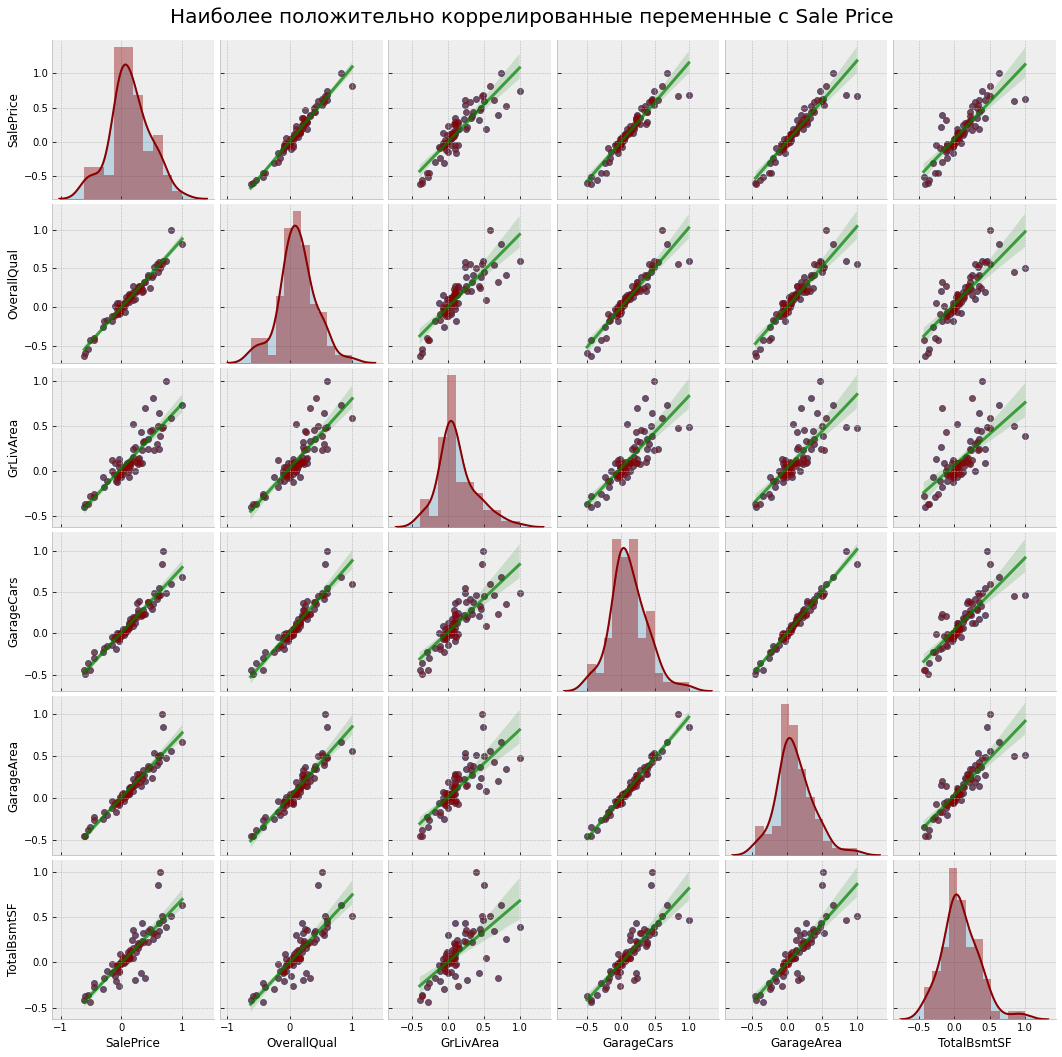

In [39]:
'''Создаем точечную диаграмму матрицы положительно коррелированных переменных (топ-5) с ценой продажи.'''
corr_positive = df_corr.loc[:, ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
g = sns.pairplot(corr_positive, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws':{'color':'green', 'alpha': 0.7}}) 
#kind-тип графикиков прямых, diag_kind-тип графиков гистограмм, plot_kws-цвет и ширина линий на графике   
g = g.map_diag(sns.distplot, color = 'darkred')#стиль графиков по диагонали
g = g.map_offdiag(plt.scatter, alpha = 0.5, color = 'darkred')#стиль графиков не по диагонали
g.fig.suptitle('Наиболее положительно коррелированные переменные с Sale Price', fontsize = 20)#название графика и размер шрифта
plt.subplots_adjust(top = 0.95)#где находится название графика

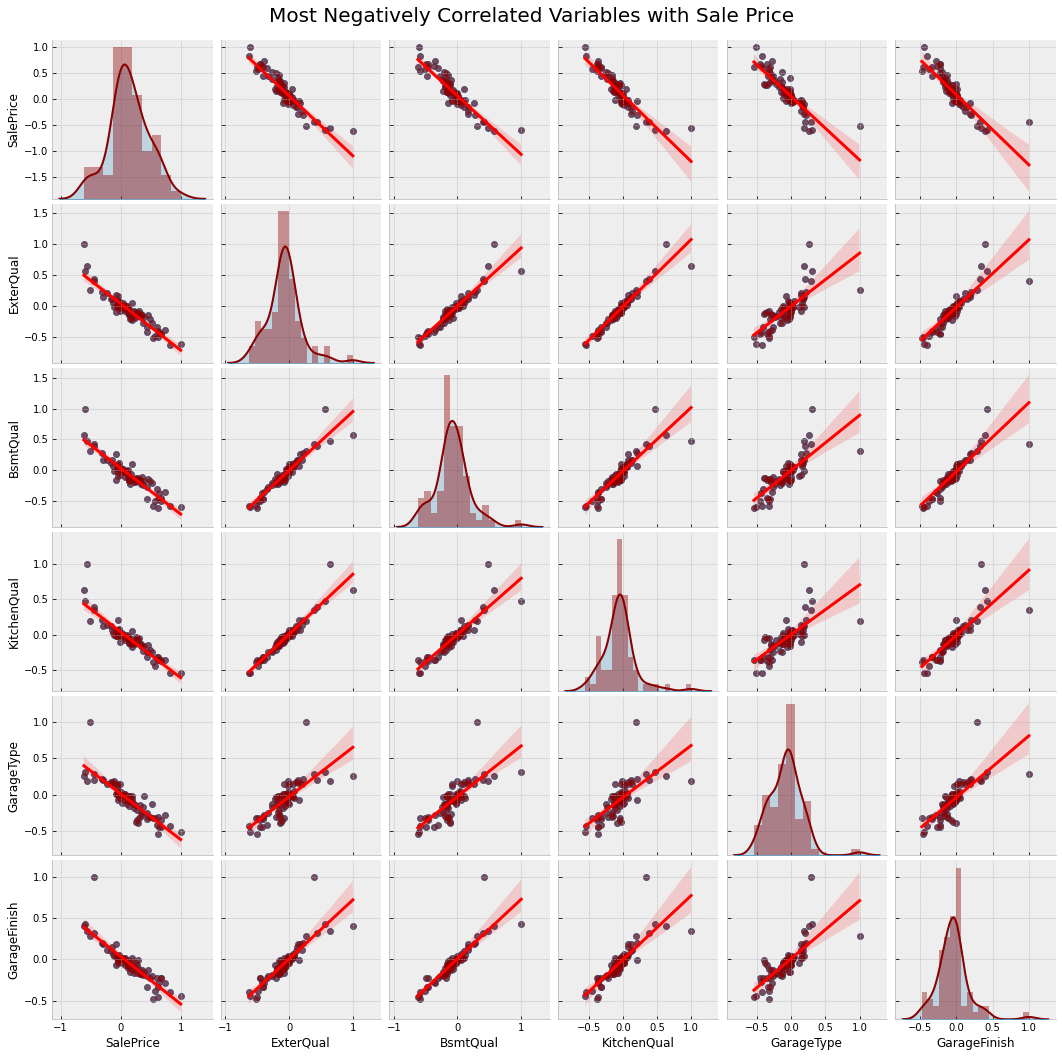

In [40]:
""" Создаем точечную диаграмму матрицы отрицательно коррелированных переменных (топ-5) с ценой продажи."""
corr_neg = df_corr.loc[:, ['SalePrice', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageType', 'GarageFinish']]
g = sns.pairplot(corr_neg, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws':{'color':'red'}})
g = g.map_diag(sns.distplot, color = 'darkred')
g = g.map_offdiag(plt.scatter, alpha = 0.5, color = 'darkred')
g.fig.suptitle('Most Negatively Correlated Variables with Sale Price', fontsize = 20)
plt.subplots_adjust(top = 0.95)

## 9.1 Числовая и Числовая переменная<a id="9.1"></a>
Среди этих 20 переменных GrLivArea, YearBuilt, GarageArea, TotalBsmtSF, 1stFlrSF, YearRemodAdd, GarageYrBlt являются непрерывными числовыми переменными. Следовательно, мы хотели бы исследовать, как эти числовые непрерывные переменные коррелируют с нашей зависимой переменной SalePrice с помощью графика регрессии.

In [41]:
'''Постройте график регрессии, чтобы увидеть, как Цена продажи коррелирует с числовыми переменными.'''
corr_num = df_merged.loc[:, ['GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt']]
corr_num = corr_num.iloc[0:1456, :] #отрезаем все после 1456 строчки, чтобы оставить только train
for i in corr_num.columns: #создаем цикл
    x = corr_num[i] #x-будет брать по очереди столбцы из corr_num
    y = y_train  #y-SalePrice
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
    line = slope*x + intercept #задаем регресиионную линию

    # Создание набора данных и построение графика
    trace0 = go.Scatter( #https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html
                  x = x,
                  y = y,
                  mode = 'markers', #точки на графике
                  marker = dict(color = 'red'),
                  name ='Data'
                  )
    
    # Creating regression line
    trace1 = go.Scatter(
                  x = x,
                  y = line,
                  mode='lines', #линия на графике
                  marker = dict(color = 'green'), #dict-новый пустой словарь
                  name='Fit'
                  )

    # Макет для графика регрессии
    title = '{} vs SalePrice (r: {:0.4f}, p: {})'.format(corr_num[i].name, r_value, p_value) 
    layout = go.Layout( #https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html
            title = title, yaxis = dict(title = 'SalePrice'))

    data = [trace0, trace1] 
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

## 9.2 Категориальная и числовая переменная<a id="9.2"></a>
Boxplot диаграмма между нашими числовыми и категориальными переменными помогает выявить, отличается ли распределение числовой переменной в разных классах номинальных переменных. Более конкретно, как цена продажи (сильно или слабо) связана с этими категориальными переменными. Среди 20 переменных, verallQual, GarageCars, FullBath, ExterQual, BsmtQual, KitchenQual, GarageType, GarageFinish, HeatingQC, BsmtExposure, LotShape, MSZoning, KitchenAbvGr - это категориальные переменные, которые сильно коррелируют (положительно или отрицательно) с ценой продажи.

In [48]:
'''Создаем боковые диаграммы, чтобы увидеть связь между категориальными и целевыми переменными.'''
corr_cat = df_merged.loc[:, ['OverallQual', 'GarageCars', 'FullBath', 'ExterQual', 'BsmtQual','KitchenQual', 'GarageType', \
                             'GarageFinish', 'HeatingQC', 'BsmtExposure', 'LotShape', 'MSZoning', 'KitchenAbvGr']]
corr_cat = corr_cat.iloc[0:1456, :]
for i in corr_cat.columns: #создаем цикл с категориальными признаками
    trace = go.Box(x = corr_cat[i], y = y_train, marker = dict (color = 'magenta'))
    data = [trace]
    layout = go.Layout(title = '{} vs SalePrice'.format(i), yaxis = dict(title = 'SalePrice'))
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

Поскольку эти переменные тесно связаны с SalePrice, медианная цена продажи должна отличаться в разных классах (группах) этих категориальных переменных. Мы можем визуализировать этот шаблон с помощью сводной таблицы.

In [50]:
'''Создаем сводную таблицу, чтобы увидеть, изменяется ли средняя цена продажи по группам категориальных переменных.'''
pivot_df = pd.concat([corr_cat, y_train], axis = 1) #создаём pivot_df в котором к df добавляем SalePrice
for i in corr_cat.columns: #создаём цикл
    pivot_table = pivot_df.pivot_table(index = i, values = 'SalePrice', aggfunc = np.mean) 
#https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html 
#index - указываем категориальную переменную, values - указываем переменную для подсчета, aggfunc-указываем что мы с ней делаем 
    bar_plot(pivot_table.index, pivot_table.SalePrice, '{} vs Mean SalePrice'.format(i), 'Mean SalePrice', 'Rainbow')
#строим bar plot, где по оси x - по очереди(с помощью цикла) будем брать бинарные переменные, а по y - среднюю SalePrice в 
#в группах перменных

**** Средняя цена продажи различна по группам из четырех различных категориальных переменных, и, следовательно, они имеют высокую корреляцию с ценой продажи.**

# 10.Разработка функций<a id="10"></a>

## 10.1 Создание новых функций<a id="10.1"></a>
Мы бы создали новую функцию под названием Totals F, объединяющую Total Bsmt SF, 1-й Flr SF и 2-й FLRSF.

In [61]:
'''Создание итоговой функций'''
df_merged_num['TotalSF'] = df_merged_num['TotalBsmtSF'] + df_merged_num['1stFlrSF'] + df_merged_num['2ndFlrSF']
#создали новый столбец в датафрейме под названием TotalSF который состоит из сложений строк TotalBsmtSF, 1stFlrSF и 2ndFlrSF

<ipython-input-61-dcca4f9a999d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 10.2 Масштабирование функций<a id="10.2"></a>
Обычно хорошо известны два метода масштабирования данных, т. е. нормализация и стандартизация. Нормализация масштабирует все числовые переменные в диапазоне [0,1]. Так что выбросы могут быть потеряны. С другой стороны, стандартизация преобразует данные так, чтобы они имели нулевое среднее значение и единичную дисперсию. Масштабирование функций помогает быстрее сходиться при градиентном спуске, тем самым сокращая время обучения. Нет необходимости стандартизировать целевую переменную. Однако из-за наличия выбросов мы бы использовали робастный анализатор sklearn, поскольку на него не влияют выбросы. **Для получения дополнительной информации см. [документацию](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)**

In [73]:
'''Стандартизированные числовые функции с помощью RobustScaler'''
from sklearn.preprocessing import RobustScaler

'''Инициализируем robust scaler object.'''
robust_scl = RobustScaler() #создаём объект под названием robust_scl 

'''Обучаем scaler object on train data.'''
robust_scl.fit(df_merged_num) #обучаем наши числовые данные и генерируем параметры модели

'''Применяем объект масштабирования как к train, так и к test данным.'''
df_merged_num_scaled = robust_scl.transform(df_merged_num) #применяем к модели для создания преобразованного набора данных в
#массив numpy

In [85]:
'''Получение имен столбцов'''
df_merged_num_scaled = pd.DataFrame(data = df_merged_num_scaled, columns = df_merged_num.columns, index = df_merged_num.index)
# Передайте индекс индекса df_merged_num, в противном случае он будет суммировать индекс
# Создаём получаенные данные из numpy преобразуем в DataFrame, где data - значения в массиве, columns - название колонок,
#а index = df_merged_num.index чтобы индексы не суммировались 

## 10.3 Кодирование категориальных переменных<a id="10.3"></a>
Мы должны кодировать категориальные переменные, чтобы наши алгоритмы машинного обучения могли их интерпретировать. Мы бы использовали label encoding, а затем one hot encoding.

### 10.3.1 Label Encoding<a id="10.3.1"></a>
**Мы хотели бы закодировать некоторые категориальные (порядковые) переменные, чтобы сохранить их порядковость. Если мы используем labelencoder sklearn, он будет случайным образом кодировать эти порядковые переменные, и поэтому ординальность будет потеряна. Чтобы преодолеть это, мы будем использовать метод замены pandas для ручного кодирования порядковых переменных. Переменные, такие как LotShape, LandContour, Utilities, LandSlope, OverallQual (уже закодировано), OverallCond (уже закодировано), ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, HeatingQC, BsmtFinType2, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence имеют внутренние заказы. Закодируем их.**

In [87]:
"""Извлечем категориальные переменные и преобразуем их в категорию."""
df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')

"""Начнем утомительный процесс кодирования меток."""
df_merged_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
df_merged_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df_merged_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_merged_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [90]:
'''Все закодированные переменные имеют тип  int64, за исключением OverallQual и OverallCon. Так что преобразуем их обратно в int64.'''
df_merged_cat.loc[:, ['OverallQual', 'OverallCond']] = df_merged_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')

'''Извлекаем переменные, закодированные метками'''
df_merged_label_encoded = df_merged_cat.select_dtypes(include = ['int64'])

### 10.3.2 One Hot Encoding <a id="10.3.2"></a>
Категориальные переменные без какого-либо внутреннего порядка будут преобразованы в числовые для нашей модели с помощью метода pandas get_dummies. Таким образом, в основном переменные в фрейме данных df_merged_cat с типами категорий являются номинальными переменными для одной горячей кодировки.

In [92]:
'''Теперь извлекаем номинальные переменные для  one hot encoding.'''
df_merged_one_hot = df_merged_cat.select_dtypes(include = ['category'])
df_merged_one_hot = pd.get_dummies(df_merged_one_hot)

In [97]:
"""Объединим one hot encoded и label encoded вместе."""
df_merged_encoded = pd.concat([df_merged_one_hot, df_merged_label_encoded], axis = 1)

'''Соединим обработанные категориальные и числовые переменные.'''
df_merged_processed = pd.concat([df_merged_num_scaled, df_merged_encoded], axis = 1)

In [98]:
'''Теперь извлекаем данные о train и test для моделирования.'''
df_train_final = df_merged_processed.iloc[0:1456, :]
df_test_final = df_merged_processed.iloc[1456:, :]

'''Наша целевая переменная y_train.'''
y_train = y_train

In [101]:
"""Давайте посмотрим на наш окончательный train и test данные для моделирования."""
bold('**Обновленная train data для моделирования**')
display(df_train_final.head(3))
bold('**Обновленная test data для моделирования:**')
display(df_test_final.head(3))

**Обновленная train data для моделирования**

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0 -0.512612  1.029526        0.0           0.0    0.098563         0.0   
1  0.336748  0.000000        0.0           0.0    0.147903         0.0   
2 -0.354872  1.031651        0.0           0.0    0.042059         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  HeatingQC  \
0           1.0      0.000000  -0.875494            0.0  ...          4   
1           0.0      0.693147  -0.383868            0.0  ...          4   
2           1.0      0.000000  -0.056594            0.0  ...          4   

   KitchenQual  LandContour  LandSlope  LotShape  OverallCond  OverallQual  \
0            2            3          2         3            5            7   
1            1            3          2         3            8            6   
2            2            3          2         2            5            7   

   PavedDrive  PoolQC  Utilities  
0           2       0          1  
1           2       0          1  
2           2       0          1  

[3 rows x 248 columns]

**Обновленная test data для моделирования:**

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0 -0.512612  1.029526        0.0           0.0    0.098563         0.0   
1  0.336748  0.000000        0.0           0.0    0.147903         0.0   
2 -0.354872  1.031651        0.0           0.0    0.042059         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  HeatingQC  \
0           1.0      0.000000  -0.875494            0.0  ...          2   
1           0.0      0.693147  -0.383868            0.0  ...          2   
2           1.0      0.000000  -0.056594            0.0  ...          3   

   KitchenQual  LandContour  LandSlope  LotShape  OverallCond  OverallQual  \
0            1            3          2         3            6            5   
1            2            3          2         2            6            6   
2            1            3          2         2            5            5   

   PavedDrive  PoolQC  Utilities  
0           2       0          1  
1           2       0          1  
2           2       0          1  

[3 rows x 248 columns]

# 11.Построение и оценка модели<a id="11"></a>
После того, как вся предварительная обработка выполнена и обработана, мы готовы обучать регрессионные модели обработанными данным.

In [102]:
"""Давайте в последний раз взглянем на наши данные"""
bold('**Измерение данных для построения модели:**')
print('Размер входной матрицы:', df_train_final.shape)
print('Размер выходного вектора:',y_train.shape)
print('Размер test data:', df_test_final.shape)

**Измерение данных для построения модели:**

Размер входной матрицы: (1456, 248)
Размер выходного вектора: (1456,)
Размер test data: (1459, 248)


## 11.1 Модельное обучение<a id="11.1"></a>

In [103]:
'''Задаем значения seed для random_state'''
seed = 43

'''Импортируем все интересующие нас объекты регрессионных моделей.'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html  l2-регулизатор
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html  l1-регулизатор
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
# ElasticNet - линейная регрессия с объединенными априорными значениями L1 и L2 в качестве регуляризатора.
from sklearn.kernel_ridge import KernelRidge
#https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html
from sklearn.tree import DecisionTreeRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.svm import SVR
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
from sklearn.neighbors import KNeighborsRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from xgboost import XGBRegressor
# https://xgboost.readthedocs.io/en/latest/python/python_api.html
from lightgbm import LGBMRegressor
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html


'''Нас интересуют следующие 14 регрессионных моделей.
Все инициализированы параметрами по умолчанию, кроме random_state и n_jobs.'''
#n_jobs - этот параметр используется для указания количества параллельных процессов или потоков, если n_jobs = -1, то 
#он будет использовать все ядр
#random_state - Соответственно если мы хотим сравнить несколько методов или разные наборы параметров, то для честного сравнения 
#надо использовать одинаковые обучающие и проверочные сеты

linear = LinearRegression(n_jobs = -1) 
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
kr = KernelRidge()
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor(n_jobs = -1)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(random_state = seed, n_jobs = -1)
lgb = LGBMRegressor(random_state = seed, n_jobs = -1)

In [114]:
'''Точность обучения наших регрессионных моделей. По умолчанию метод оценки возвращает коэффициент детерминации (r_squared).'''
def train_r2(model): #создаем функцию с переменной модель
    model.fit(df_train_final, y_train) #переменная модель будет обучаться на финальной дате и таргете
    return model.score(df_train_final, y_train) #а потом функция возращает оценку модели(коэффициент детерминации)

'''Рассчитаем и построим график точности обучения.'''
models = [linear, lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb] #создаем массив из всех моделей
training_score = [] #создаем массив с названием training_score 
for model in models: #создаем цикл который будет заполняться оценками каждой модели
    training_score.append(train_r2(model))
    
'''График данных о точности обучения.'''
train_score = pd.DataFrame(data = training_score, columns = ['Training_R2']) #создаем датафрейм с оценками моделей
train_score.index = ['LR', 'LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB'] #называем индексы
train_score = (train_score*100).round(4) #умножаем оценки на 100 и показываем значения с 4-мя знаками после запятой 
scatter_plot(train_score.index, train_score['Training_R2'], 'Training Score (R_Squared)', 'Models','% Training Score', 30, 'Rainbow')
#строим scatter plot

**** Будучи проблемой регрессии, метод оценки возвращает r_squared (коэффициент детерминации), и, следовательно, чем больше, тем лучше. Похоже, что DT и ET имеют ровно 100% r2_score. Обычно более высокий r2_score лучше, но r2_score, очень близкий к 1, может указывать на переобучение. Но точности модели недостаточно, чтобы определить, может ли модель обобщать невидимые данные или нет. Потому что обучающие данные - это то, с чем наша модель была обучена, то есть данные, которые наша модель уже видела. Мы все знаем, что целью построения модели машинного обучения является обобщение невидимых данных, т.е. данных, которые наша модель еще не видела. Следовательно, мы не можем использовать точность обучения для оценки нашей модели, скорее мы должны знать, как наша модель будет работать с данными, которые наша модель еще не увидела.**

## 11.2 Оценка модели<a id="11.2"></a>
Таким образом, в принципе, для оценки производительности модели нам нужны некоторые данные (входные данные), для которых мы знаем основную истину (метку). Для этой проблемы мы не знаем основной истины для набора тестов, но мы знаем для набора train. Таким образом, идея состоит в том, чтобы обучить и оценить производительность модели на разных данных. Единственное, что мы можем сделать, это разделить состав на две группы, обычно в соотношении 80:20. Это означает, что мы будем обучать нашу модель на 80 % обучающих данных, а остальные 20 % мы оставляем за собой для оценки модели, поскольку мы знаем основную истину для этих 20 % данных. Затем мы можем сравнить наш прогноз модели с этой основной правдой (для 20 % данных). Вот как мы можем определить, как наша модель будет работать с невидимыми данными. Это первый метод оценки модели. В sklearn у нас есть метод train_test_split для этого. Давайте оценим нашу модель с помощью метода train_test_split. **Примечание: С этого момента мы будем использовать среднеквадратичную ошибку в качестве показателя оценки для этой проблемы. Так что чем меньше, тем лучше.**

In [115]:
'''Оцениваем модели по набору отказов (скажем, на 30%).'''
def train_test_split_score(model): #создаем функцию
    from sklearn.metrics import mean_squared_error 
#среднеквадратичная ошибка https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
    from sklearn.model_selection import train_test_split 
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    X_train, X_test, Y_train, Y_test = train_test_split(df_train_final, y_train, test_size = 0.3, random_state = seed)
    model.fit(X_train, Y_train) #обучаем модель на train выборке 
    prediction = model.predict(X_test) #предсказываем модель на test выборке
    mse = mean_squared_error(prediction, Y_test) #
    rmse = np.sqrt(mse) #берем корень из среднеквадратичная ошибка
    return rmse 

'''Рассчитаем оценку train_test_split для различных моделей и построим их график.'''
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
train_test_split_rmse = []
for model in models: #создаем цикл который будет заполняться оценками каждой модели
    train_test_split_rmse.append(train_test_split_score(model))

'''График датафрейма Train_Test rmse'''
train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE']) #создадим датафрейм с оценками
train_test_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']#назовем индекс
train_test_score = train_test_score.round(5) #зададим запятую после 5 значений
x = train_test_score.index 
y = train_test_score['Train_Test_RMSE']
title = "Models' Test Score (RMSE) on Holdout(30%) Set"
scatter_plot(x, y, title, 'Models','RMSE', 30, 'RdBu')

**Будучи среднеквадратичной ошибкой, чем меньше, тем лучше. Похоже, SVM - лучшая регрессионная модель, за которой следуют Ridge, GB и XGB. К сожалению, LR не может найти какой-либо линейный шаблон, поэтому он работает хуже всего и, следовательно, отбрасывается.** 

Однако разделение train_test имеет свои недостатки. Потому что этот подход вводит предвзятость, поскольку мы не используем все наши наблюдения для тестирования, а также уменьшаем размер данных о поездах. Чтобы преодолеть это, мы можем использовать метод, называемый перекрестной проверкой, при котором все данные периодически используются для обучения и тестирования. Таким образом, мы можем уменьшить смещение, вносимое train_test_split. Из различных методов перекрестной проверки мы бы использовали k-кратную перекрестную проверку. В sklearn у нас есть метод cross_val_score для вычисления k-кратного балла перекрестной проверки.

Однако, по мере увеличения набора поездов, train_test_split имеет преимущество перед k-кратной перекрестной проверкой. Train_test_split в k раз быстрее, чем перекрестная проверка в k раз. Если обучающий набор очень велик, как train_test_split, так и k-кратная перекрестная проверка выполняются одинаково. Таким образом, для больших обучающих данных train_test_split предпочтительнее k-кратной перекрестной проверки для ускорения процесса обучения.

### 11.2.1 K-Fold Cross Validation<a id="11.2.1"></a>
Допустим, мы будем использовать 10-кратную перекрестную проверку. Итак, k = 10, и у нас всего 1456 наблюдений. Каждая складка будет иметь 1456/10 = 145,6 наблюдений. Таким образом, в основном перекрестная проверка k-кратности использует fold-1 (145,6 выборки) в качестве тестового набора и k-1 (9 сгибов) в качестве обучающих наборов и вычисляет точность теста.Эта процедура повторяется k раз (если k = 10, то 10 раз); каждый раз другая группа наблюдений рассматривается как проверочный или тестовый набор. Этот процесс приводит к получению k оценок точности теста, которые затем усредняются.

In [126]:
'''Функция для вычисления результатов перекрестной проверки.'''
def cross_validate(model):
    from sklearn.model_selection import cross_val_score 
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
    neg_x_val_score = cross_val_score(model, df_train_final, y_train, cv = 10, n_jobs = -1, scoring = 'neg_mean_squared_error')
    x_val_score = np.round(np.sqrt(-1*neg_x_val_score), 5) #умножаем значения на (-1) и берем корень 
    return x_val_score.mean() 

'''Рассчитываем оценку перекрестной проверки различных моделей и стороим их график.'''
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validate(model))

'''Постройте график данных результатов перекрестной проверки.'''
x_val_score = pd.DataFrame(data = cross_val_scores, columns = ['Cross Validation Scores (RMSE)'])
x_val_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
x_val_score = x_val_score.round(5)
x = x_val_score.index
y = x_val_score['Cross Validation Scores (RMSE)']
title = "Models' 10-fold Cross Validation Scores (RMSE)"
scatter_plot(x, y, title, 'Models','RMSE', 30, 'Viridis')

**Похоже, что Ridge удалось превзойти SVM как лучшую регрессионную модель при 10-кратной перекрестной проверке. И rmse GB, XGB, и LGB также снизились по сравнению с rmse предыдущего набора.**

### 11.2.2 Оптимизация гиперпараметров<a id="11.2.2"></a>
Теперь давайте добавим *Grid Search** ко всем моделям в надежде оптимизировать их гиперпараметры и тем самым повысить их точность. Являются ли параметры модели по умолчанию лучшим выбором? Давайте выясним.

Примечание: Хотя оптимизация гиперпараметров занимает много времени, гиперпараметры следует настраивать для всех моделей.

In [129]:
def grid_search_cv(model, params): 
    global best_params, best_score
    from sklearn.model_selection import GridSearchCV 
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 10, verbose = 1, 
                            scoring = 'neg_mean_squared_error', n_jobs = -1)
#verbose = 1-отображается время вычисления 
    grid_search.fit(df_train_final, y_train)
    best_params = grid_search.best_params_ 
    best_score = np.sqrt(-1*(np.round(grid_search.best_score_, 5)))
    return best_params, best_score

#### 11.2.2.1 Optimize Lasso

In [134]:
''''Определение гиперпараметров для lasso.'''
alpha = [0.0001, 0.0002, 0.00025, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037, 0.00038, 
         0.0004, 0.00045, 0.0005, 0.00055, 0.0006, 0.0008,  0.001, 0.002, 0.005, 0.007, 0.008, 0.01]

lasso_params = {'alpha': alpha,
               'random_state':[seed]}

grid_search_cv(lasso, lasso_params)
lasso_best_params, lasso_best_score = best_params, best_score
print('Lasso best params:{} & best_score:{:0.5f}' .format(lasso_best_params, lasso_best_score))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Lasso best params:{'alpha': 0.00033, 'random_state': 43} & best_score:0.10932


#### 11.2.2.2 Optimize Ridge

In [137]:
''''Определение гиперпараметров для ridge.'''
ridge_params = {'alpha':[ 9, 9.2, 9.4, 9.5, 9.52, 9.54, 9.56, 9.58, 9.6, 9.62, 9.64, 9.66, 9.68, 9.7,  9.8],
               'random_state':[seed]}

grid_search_cv(ridge, ridge_params)
ridge_best_params, ridge_best_score = best_params, best_score
print('Ridge best params:{} & best_score:{:0.5f}' .format(ridge_best_params, ridge_best_score))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Ridge best params:{'alpha': 9.64, 'random_state': 43} & best_score:0.11077


#### 11.2.2.3 Optimize Kernel Ridge

In [138]:
'''Определение гиперпараметров для kernel ridge'''
kernel_params = {'alpha':[0.27, 0.28, 0.29, 0.3],
                'kernel':['polynomial', 'linear'], 
                'degree':[2, 3],
                'coef0':[3.5, 4, 4.2]}
grid_search_cv(kr, kernel_params)
kernel_best_params, kernel_best_score = best_params, best_score
print('Kernel Ridge best params:{} & best_score:{:0.5f}' .format(kernel_best_params, kernel_best_score))

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Kernel Ridge best params:{'alpha': 0.28, 'coef0': 4, 'degree': 2, 'kernel': 'polynomial'} & best_score:0.10849


#### 11.2.2.4 Optimize Elastic Net

In [139]:
'''Определение гиперпараметров для Elastic net.'''
elastic_params = {'alpha': [ 0.0003, 0.00035, 0.00045, 0.0005], 
                 'l1_ratio': [0.80, 0.85, 0.9, 0.95],
                 'random_state':[seed]}
grid_search_cv(elnt, elastic_params)
elastic_best_params, elastic_best_score = best_params, best_score
print('Elastic Net best params:{} & best_score:{:0.5f}' .format(elastic_best_params, elastic_best_score))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Elastic Net best params:{'alpha': 0.00035, 'l1_ratio': 0.95, 'random_state': 43} & best_score:0.10932


#### 11.2.2.5 Optimize Support Vector Machine

In [140]:
'''Определение гиперпараметров для support vector machine'''
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # precomputed is omitted from kernel to avoid error.
    'C': [4, 5], 
    'gamma':[0.0001, 0.001]}

grid_search_cv(svm, svm_params)
svm_best_params, svm_best_score = best_params, best_score
print('SVM best params:{} & best_score:{:0.5f}' .format(svm_best_params, svm_best_score))
# Не беспокойтесь, это займет некоторое время. Обучение обычно проходит медленнее в svm.

Fitting 10 folds for each of 16 candidates, totalling 160 fits
SVM best params:{'C': 5, 'gamma': 0.001, 'kernel': 'rbf'} & best_score:0.11162


#### 11.2.2.6 Optimize XGB, GB, and LGB

In [141]:
'''Определение гиперпараметров для xgb'''
xgb_opt = XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468, 
                             learning_rate = 0.04, max_depth = 3, 
                             min_child_weight = 1.7817, n_estimators = 2500,
                             reg_alpha = 0.4640, reg_lambda = 0.8571,
                             subsample = 0.5213, silent = 1,
                             nthread = -1, random_state = 7)

'''Определение гиперпараметров для gb'''
gb_opt = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10, 
                                   loss = 'huber', random_state = seed)
'''Определение гиперпараметров для lgb'''
lgb_opt = LGBMRegressor(objective = 'regression', num_leaves = 5,
                              learning_rate=0.05, n_estimators = 660,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed = 9, bagging_seed = 9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)

'''Мы можем предположить, что эти 3 лучших балла модели равны баллам перекрестной проверки.'''
xgb_best_score = cross_validate(xgb_opt)
gb_best_score = cross_validate(gb_opt)
lgb_best_score = cross_validate(lgb_opt)

KeyboardInterrupt: 

In [142]:
"""Давайте построим график rmse моделей после оптимизации."""
optimized_scores = pd.DataFrame({'Optimized Scores':np.round([lasso_best_score, ridge_best_score, kernel_best_score, 
                  elastic_best_score, svm_best_score, xgb_best_score, gb_best_score, lgb_best_score], 5)})
optimized_scores.index = ['Lasso', 'Ridge', 'Kernel_ridge', 'E_net', 'SVM', 'XGB', 'GB', 'LGB']
optimized_scores.sort_values(by = 'Optimized Scores')
scatter_plot(optimized_scores.index, optimized_scores['Optimized Scores'], "Models' Scores after Optimization", 'Models','Optimized Scores', 40, 'Rainbow')

**Похоже, что kernel ridge - лучшая модель после оптимизации. Lasso  и elastic net score абсолютно идентичны. LGB и GB  показывают худшие результаты среди пяти моделей после оптимизации.**

### 11.2.3 Переподготовка и прогнозирование с использованием лучших гиперпараметров<a id="11.2.3"></a>
Теперь мы хотели бы переобучить наши модели, используя лучшие параметры, отвечающие за лучший rmse после оптимизации. Затем мы бы спрогнозировали на основе тестовых данных, чтобы увидеть, как различные модели работают.

In [143]:
'''8 объектных моделей с лучшими гиперпараметрами'''
lasso_opt = Lasso(**lasso_best_params)
ridge_opt = Ridge(**ridge_best_params)
kernel_ridge_opt = KernelRidge(**kernel_best_params)
elastic_net_opt = ElasticNet(**elastic_best_params)
svm_opt = SVR(**svm_best_params)
xgb_opt = xgb_opt
gb_opt = gb_opt
lgb_opt = lgb_opt

In [144]:
'''Теперь тренируемся и прогнозируем с помощью оптимизированных моделей'''
def predict_with_optimized_models(model):
    model.fit(df_train_final, y_train)
    y_pred = np.expm1(model.predict(df_test_final))
    submission = pd.DataFrame()
    submission['Id']= test.Id
    submission['SalePrice'] = y_pred
    return submission

[20:56:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [145]:
'''Постройте график результатов таблицы лидеров.'''
scores_on_submission = pd.DataFrame({'Leaderboard_score':[0.12193, 0.12005, 0.11786, 0.12190, 0.12057, 0.12764, 0.12234, 0.12188]})
scores_on_submission.index = ['Opt_lasso', 'Opt_ridge', 'Opt_kernel_ridge', 'Opt_elastic_net', 'Opt_svm', 'Opt_xgb', 'Opt_gb', 'Opt_lgb']
scores_on_submission.sort_values(by = 'Leaderboard_score')
scatter_plot(scores_on_submission.index, scores_on_submission['Leaderboard_score'], 'Leaderboard Scores after Optimization','Models', 'Optimized Scores', 40, 'Greens')

**Побеждает kernel ridge, которое набирает лучшие результаты (0,11786) в таблице лидеров после оптимизации, за которым следуют ridge и svm. xgb показывает худшие результаты среди 8 моделей.**

### 11.2.4 Важность функции<a id="11.2.4"></a>
Придают ли все эти 8 моделей одинаковое значение всем функциям? Конечно, нет! Мы попытались бы визуализировать важность функций, придаваемую каждой моделью, кроме svm. Поскольку svm не использует линейное ядро, его важность функции не может быть определена.

In [146]:
'''Функция для построения точечной диаграммы важности объекта lasso, ridge and elastic net.'''
def plot_feature_importance(model, title):
    model.fit(df_train_final, y_train)
    coef = pd.DataFrame({'Feature':df_train_final.columns,'Importance':np.transpose(model.coef_)})
    coef = coef.set_index('Feature')
    trace = go.Scatter(x = coef.index, y = coef.Importance, mode = 'markers',
            marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Hot'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    iplot(fig)

'''Функция построения графика важности для оптимизации lasso, ridge, and elastic net.'''
plot_feature_importance(lasso_opt, 'Lasso Feature Importance')
plot_feature_importance(ridge_opt, 'Ridge Feature Importance')
plot_feature_importance(elastic_net_opt, 'ElasticNet Feature Importance')

****Похоже, что GrLivArea является наиболее положительно коррелирующим фактором для цены продажи, в то время как MS Zoning_C(all) является наиболее обратно коррелирующим фактором для цены продажи для всех трех моделей.**

In [147]:
'''Важность функции для xgb, gb, and lgb.'''
def plot_featute_importance(model, title):
    importance = pd.DataFrame({'Features': df_train_final.columns, 'Importance': model.feature_importances_})
    importance = importance.set_index('Features')
    trace = go.Scatter(x = importance.index, y = importance.Importance, mode = 'markers',
                      marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Rainbow'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    iplot(fig)
    
plot_featute_importance(xgb_opt, 'XGB Feature Importance')
plot_featute_importance(gb_opt, 'GB Feature Importance')
plot_featute_importance(lgb_opt, 'LGB Feature Importance')

**Площадь Gr Liv и LotArea, по-видимому, являются наиболее важными характеристиками для xgb, gb, and lgb.**

### 11.2.5 Кривые обучения<a id="11.2.5"></a>
Построим кривые обучения, чтобы увидеть компромисс смещение-дисперсия в наших моделях.

In [148]:
'''Создайте функцию для построения кривых обучения.'''
def plot_learning_curve(model):
    from sklearn.model_selection import learning_curve
    

    train_sizes, train_scores, test_scores = learning_curve(model, df_train_final, y_train, 
                                            train_sizes = np.linspace(0.01, 1.0, 20), cv = 10, scoring = 'neg_mean_squared_error', 
                                            n_jobs = -1, random_state = seed)
    
    
    # Создаем средние значения и стандартные отклонения train
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Создаем средние значения и стандартные отклонения test
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)  
    
    # цвет и названия линий
    plt.plot(train_sizes, train_mean, 'o-', color = 'red',  label = 'Training score')
    plt.plot(train_sizes, test_mean, 'o-', color = 'green', label = 'Cross-validation score')
    
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'r') 
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1, color = 'g')
    
    
    
    font_size = 12
    plt.xlabel('Training Set Size', fontsize = font_size)
    plt.ylabel('Accuracy Score', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = 'best')
    plt.grid()

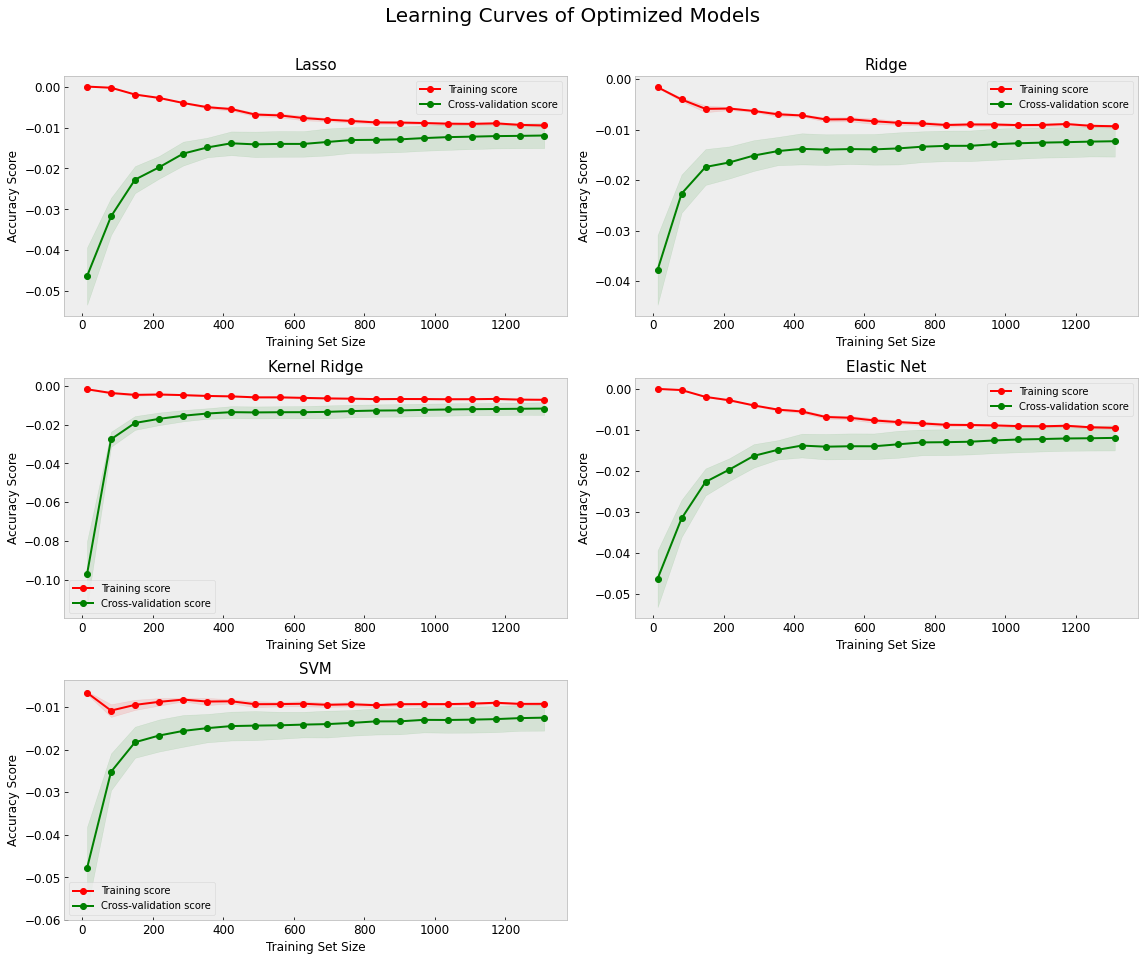

In [149]:
'''Теперь построим кривые обучения оптимизированных моделей на подзаголовках.
Не будем рисовать из-за плохих результатов XGB, GB и LGB.'''
plt.figure(figsize = (16,14))
lc_models = [lasso_opt, ridge_opt, kernel_ridge_opt, elastic_net_opt, svm_opt]
lc_labels = ['Lasso', 'Ridge', 'Kernel Ridge', 'Elastic Net', 'SVM']

for ax, models, labels in zip (range(1,6), lc_models, lc_labels):
    plt.subplot(3,2,ax)
    plot_learning_curve(models)
    plt.title(labels, fontsize = 15)
plt.suptitle('Learning Curves of Optimized Models', fontsize = 20)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

**Все модели работают нормально с точки зрения компромисса между смещением и дисперсией, за исключением kernel ridge (всего лишь небольшое смещение или низкая дисперсия и, следовательно, недостаточное соответствие). Поскольку кривые обучения и проверки еще не сошлись, добавление дополнительных экземпляров может помочь lasso, ridge, elastic net and svm. А для kernel ridge может помочь увеличение сложности модели (возможно, добавление дополнительных функций).**